### Users' data investigation  
 
**Training task**  
  
----------------  
The purpose of this project is to study interrelation of the number of successful orders with users' age, used device and other factors.  
  
Parts of analysis:  
1. Loading data and preparation
2. Clients who made the most of successful orders
3. The most popular platform (the type of device)
4. Premium and non-premium clients per age
5. How many successful orders have the most of the clients made?
6. Successful orders made with computer per client age
  
Datasets variables description:  

<font size = 2> Dataset 1 - "user_data" - information about clients:
- <font size = 2> client – user ID
- <font size = 2> premium – whether the client is premium
- <font size = 2> age – age  
  
<font size = 2> Dataset 2 - "logs" - information about client orders:
- <font size = 2> client – user ID
- <font size = 2> success – result (success – 1, no – 0)
- <font size = 2> platform – platform
- <font size = 2> time – Unix time

#### 1. Loading data and preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
user_data = pd.read_csv('DATA/user_data.csv')    # loading the dataset 1
user_data.shape

(2954, 3)

This dataset is composed of 2 954 lines and 3 columns, let's take a closer look

In [3]:
user_data.sample(7)

,client,premium,age
555,85557,False,55
1126,88739,False,61
1807,83516,False,60
1866,46538,False,47
74,1676,False,38
2920,48820,False,45
1793,46784,True,57


In [4]:
logs = pd.read_csv('DATA/logs.csv')    # loading the dataset 2
logs.shape

(4500, 4)

In [5]:
logs.sample(7)

,client,success,platform,time
3311,52373,True,phone,1585405142
3690,21515,False,phone,1585410120
1043,28007,True,phone,1585464018
4064,50065,True,phone,1585437202
3,9961,True,phone,1585400189
494,96199,True,computer,1585422861
1838,35472,True,phone,1585405598


The second dataset contains more information: 4 500 lines and 4 columns

In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [7]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In both dataframes there aren't missing (non-null) values.  
As data in column 'platform' has object type let's look at unique values of the 'platform'

In [8]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [9]:
logs['platform'].unique()

array(['phone', 'computer', 'tablet'], dtype=object)

#### 2. Clients who made the most of successful orders

We will see which clients have made the most of successful orders.

In [10]:
# Creating a new dataframe with successful operations (success == True)

success_clients = logs.query('success == True').value_counts('client')  \
                      .reset_index().rename(columns={0: 'successful_orders'})

success_clients.head(10)

,client,successful_orders
0,12179,41
1,61468,41
2,52870,41
3,61473,41
4,92584,41
5,82563,41
6,78349,41
7,36165,41
8,28719,41
9,64064,40


9 customers have made the same maximum number of successful orders

In [11]:
top_success_clients = success_clients.head(9).sort_values('client')

# Methods, converting Pandas DataFrame into a list

list(top_success_clients['client'])        # method 1
top_success_clients['client'].tolist()     # method 2

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

#### 3. The most popular platform (the type of device)

Below you can see that the platform with the most number of successful orders is a phone.

In [12]:
logs.query('success == True').value_counts('platform')

platform
phone       2019
computer    1090
tablet       180
dtype: int64

We will find out the most popular platform among premium clients

In [13]:
# Joining dataframes, the general colunm - 'client' containing user ID numbers

user_data_logs = user_data.merge(logs, on='client', how='inner')
user_data_logs.head(7)

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
5,78605,False,36,True,tablet,1585430330
6,78605,False,36,False,phone,1585461704


In [14]:
user_data_logs.query('premium == True').value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

The same platform (phone) is most popular among premium clients

#### 4. Premium and non-premium clients per age

We will visualize client age distribution depending on client type (premium or non-premium)

<AxesSubplot: xlabel='age', ylabel='Density'>

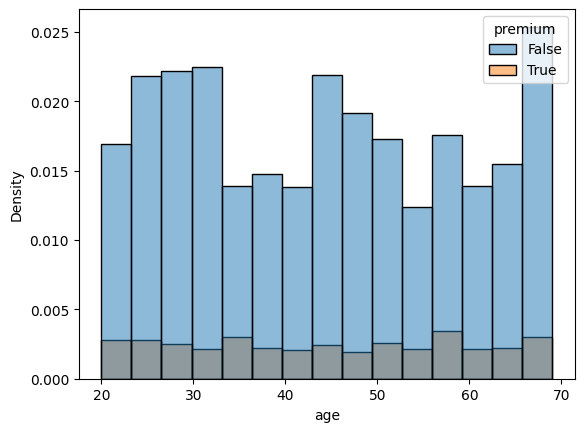

In [15]:
# A histogram represents the distribution of client types by counting the number of observations

sns.histplot(data=user_data_logs, x='age', hue='premium', stat='density')


This graph shows the normalized density distribution, where blue color is related to non-premium clients,  
grey color is related to intersected areas of premium and non-premium clients.  
There are maxima of non-premium cleints in ages 66-69, 45 and 25-32. However maxima are not obvious.  
Premium users tend to have uniform age distribution.

#### 5. How many successful orders have the most of the clients made?

We will plot the counts of successful orders distribution for counts of cilents made that counts of successful orders.  
We have already dataframe success_clients.

In [16]:

success_clients


,client,successful_orders
0,12179,41
1,61468,41
2,52870,41
3,61473,41
4,92584,41
...,...,...
2840,34121,1
2841,34191,1
2842,34198,1
2843,34277,1


<AxesSubplot: xlabel='successful_orders', ylabel='count'>

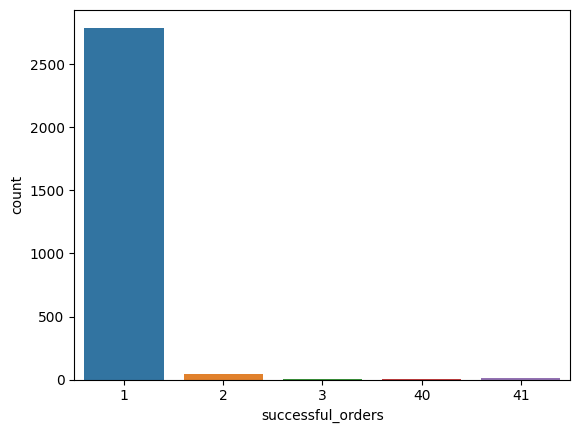

In [17]:
sns.countplot(data=success_clients, x='successful_orders')

# Show the counts of observations in each(!) categorical bin.

Most of the clients have made 1-3 successful orders.  
A minor part of the clients have made 40 and 41 operations.

#### 6. Successful orders made with computer per client age

We will visualize the distribution of the successful orders made with computer depending on client age.  

In [18]:
user_data_logs.query('success == True and platform == "computer"').head(5)

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


Text(0.5, 1.0, 'Distribution of the orders made with computer depending on client age')

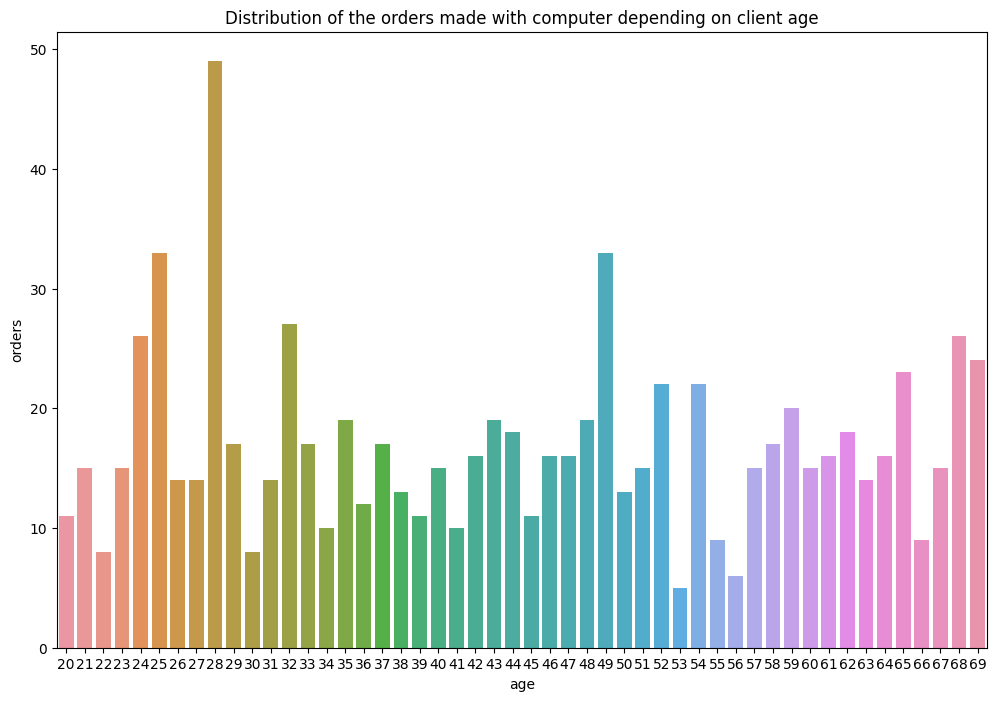

In [19]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=user_data_logs.query('success == True and platform == "computer"'), x='age')
ax.set(ylabel='orders')
plt.title("Distribution of the orders made with computer depending on client age")

The graph shows that the maximum age of clients made orders with computer is 28 years old, minimum age is 53 years old.